## Easy Demographics

Example of how to easily get through group comparisons for demographics and clinical characteristics

### Load necessary libraries and data

In [18]:
# Import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
from scipy.stats import shapiro
from statsmodels.formula.api import ols
import scikit_posthocs as sp
import matplotlib as plt
import seaborn as sns
from pandas.api.types import is_numeric_dtype
from Demographics import *

In [2]:
# Load database of all demographics
##### ! You have to load your own data here!
df1 = pd.read_excel(r"C:/Users/Angelika/Dropbox/PhD/EXPERIMENTS/02_StructuralMRI/02_ThalamicSegmentation/Visit1Data.xlsx")
df2 = pd.read_excel(r"C:/Users/Angelika/Dropbox/PhD/EXPERIMENTS/02_StructuralMRI/02_ThalamicSegmentation/\Visit2Data.xlsx")
df = pd.concat((df1, df2), axis=1)

### Check normality 

In [5]:
## Check normality across all numeric variables 
normal, nonNormal = normalityCheck(df)

### Save in text files the names of the variables
with open('NormallyDistributedVariables.txt', 'w') as filehandle:
    for listitem in normal:
        filehandle.write('%s\n' % listitem)
with open('NonNormallyDistributedVariables.txt', 'w') as filehandle:
    for listitem in nonNormal:
        filehandle.write('%s\n' % listitem)

(0.9803189635276794, 0.1324549913406372)

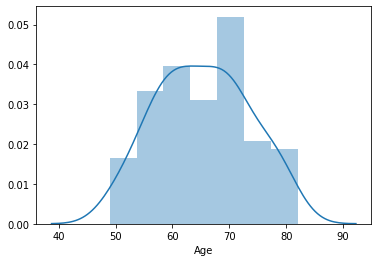

In [8]:
## Visualise distribution - if want to for individual columns
col = "Age"
sns.distplot(df[col])
stats.shapiro(df[col])

### Extract group statistics

In [10]:
### Extract group means and standard deviations
groupedDf = groupDemographics(df, "PD_VHAny")
groupedDf.to_csv("GroupedDataframe.csv")

### Compare variables between groups

In [12]:
## Load the names of the variables I want to compare
filename = r"C:\Users\Angelika\Dropbox\PhD\EXPERIMENTS\02_StructuralMRI\02_ThalamicSegmentation\DemographicsAll3groups.txt"
variables = [line.rstrip('\n') for line in open(filename)]
### Perform group comparisons
result = groupCompare(variables,"PD_VHAny",df,3) #variables, group comparison, dataframe, the group variable has 3 groups (0 controls, 1 PD non VH, 2 PD VH)
result.to_csv("GroupComparisons.csv")

In [16]:
#### Post hoc testing
## Variables that are significantly different between groups
result[result.Pvalue <=0.05]

,Variable,Statistic,Pvalue,Type
1,IntracranialVolume,0.070110,0.010172,ANOVA
6,MOCA,6.008577,0.049574,Kruskal-Wallis
8,HADSanxiety,12.428324,0.002001,Kruskal-Wallis
9,HADSdepression,23.010155,0.000010,Kruskal-Wallis
12,Stroop_colour_time,0.068283,0.011614,ANOVA
13,Stroop_both_time,7.024970,0.029823,Kruskal-Wallis


In [13]:
# Post hoc tukey test for ANOVA
var = "Stroop_colour_time"
data = df[np.isfinite(df[var])]
variable = data[var] # substitute variable sequentially to test all continuous variables following ANOVA
group = data.PD_VHAny
sp.posthoc_tukey_hsd(variable, group, alpha=0.05)
# The contrast appearing as 1 is significant / 0 is non significant / -1 for diagonals

,0,1,2
0,-1,0,1
1,0,-1,1
2,1,1,-1


In [14]:
## Post hoc dunn test for Kruskal Wallis
var = "Stroop_both_time"
X = [df[df.PD_VHAny == 0][var], df[df.PD_VHAny == 1][var], df[df.PD_VHAny == 2][var]]
sp.posthoc_dunn(X) 
### returns the exact p-values for each comparison

,1,2,3
1,-1.000000,0.484345,0.011199
2,0.484345,-1.000000,0.022603
3,0.011199,0.022603,-1.000000


In [20]:
## Compare categorical variables
filename = r"C:/Users/Angelika/Dropbox/PhD/EXPERIMENTS/02_StructuralMRI/02_ThalamicSegmentation/DemographicsPDgroupsCategorical.txt"
variables = [line.rstrip('\n') for line in open(filename)]
# do categorical comparison using chi-square
result = categoricalCompare(variables, "PD_VHAny", df)
# Export to csv
result.to_csv("CategoricalCompare.csv")